In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_code/gitignorefolder/MHB_per_read/softreadcounting/testtheidea/softRD_pileup/HardRDdevelop/corr/5g/mincpg3'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['Tr', 'Er', 'Mn', 'mB', 'DC', 'NK', 'm8', 'CD8', 'CD4', 'nB', 'Eo', 'mNeu', 'm4', 'Mg']


In [4]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [5]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [6]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)
display(df_pearson)

df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

,cd4bams_softMultiprocessing_dupindex_binnedstats.pkl_pattern.5_mincpg3_CSxOut.txt_CD4mixture_output_1000000_highestCD430percent_allrealaddedsub.txt,BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg3_ABSreadcount_divisioned.txt_CSxOut.txt_CD4mixture_output_1000000_highestCD430percent_allrealaddedsub.txt,cd4bams_softMultiprocessing_dupindex_binnedstats.pkl_pattern.65_mincpg3_CSxOut.txt_CD4mixture_output_1000000_highestCD430percent_allrealaddedsub.txt,cd4bams_softMultiprocessing_dupindex_binnedstats.pkl_pattern.8_mincpg3_CSxOut.txt_CD4mixture_output_1000000_highestCD430percent_allrealaddedsub.txt
Tr,0.981332,0.979269,0.980882,0.984093
Er,0.999058,0.999521,0.999599,0.999561
Mn,0.952534,0.998253,0.980077,0.997188
mB,0.998769,0.999212,0.999295,0.999275
DC,0.992949,0.995183,0.995473,0.996851
NK,0.988776,0.990721,0.991133,0.992293
m8,0.379594,0.461563,0.533279,0.594654
CD8,0.975029,0.980721,0.979955,0.986063
CD4,0.974928,0.987186,0.984132,0.985166
nB,0.994125,0.997631,0.995951,0.998583


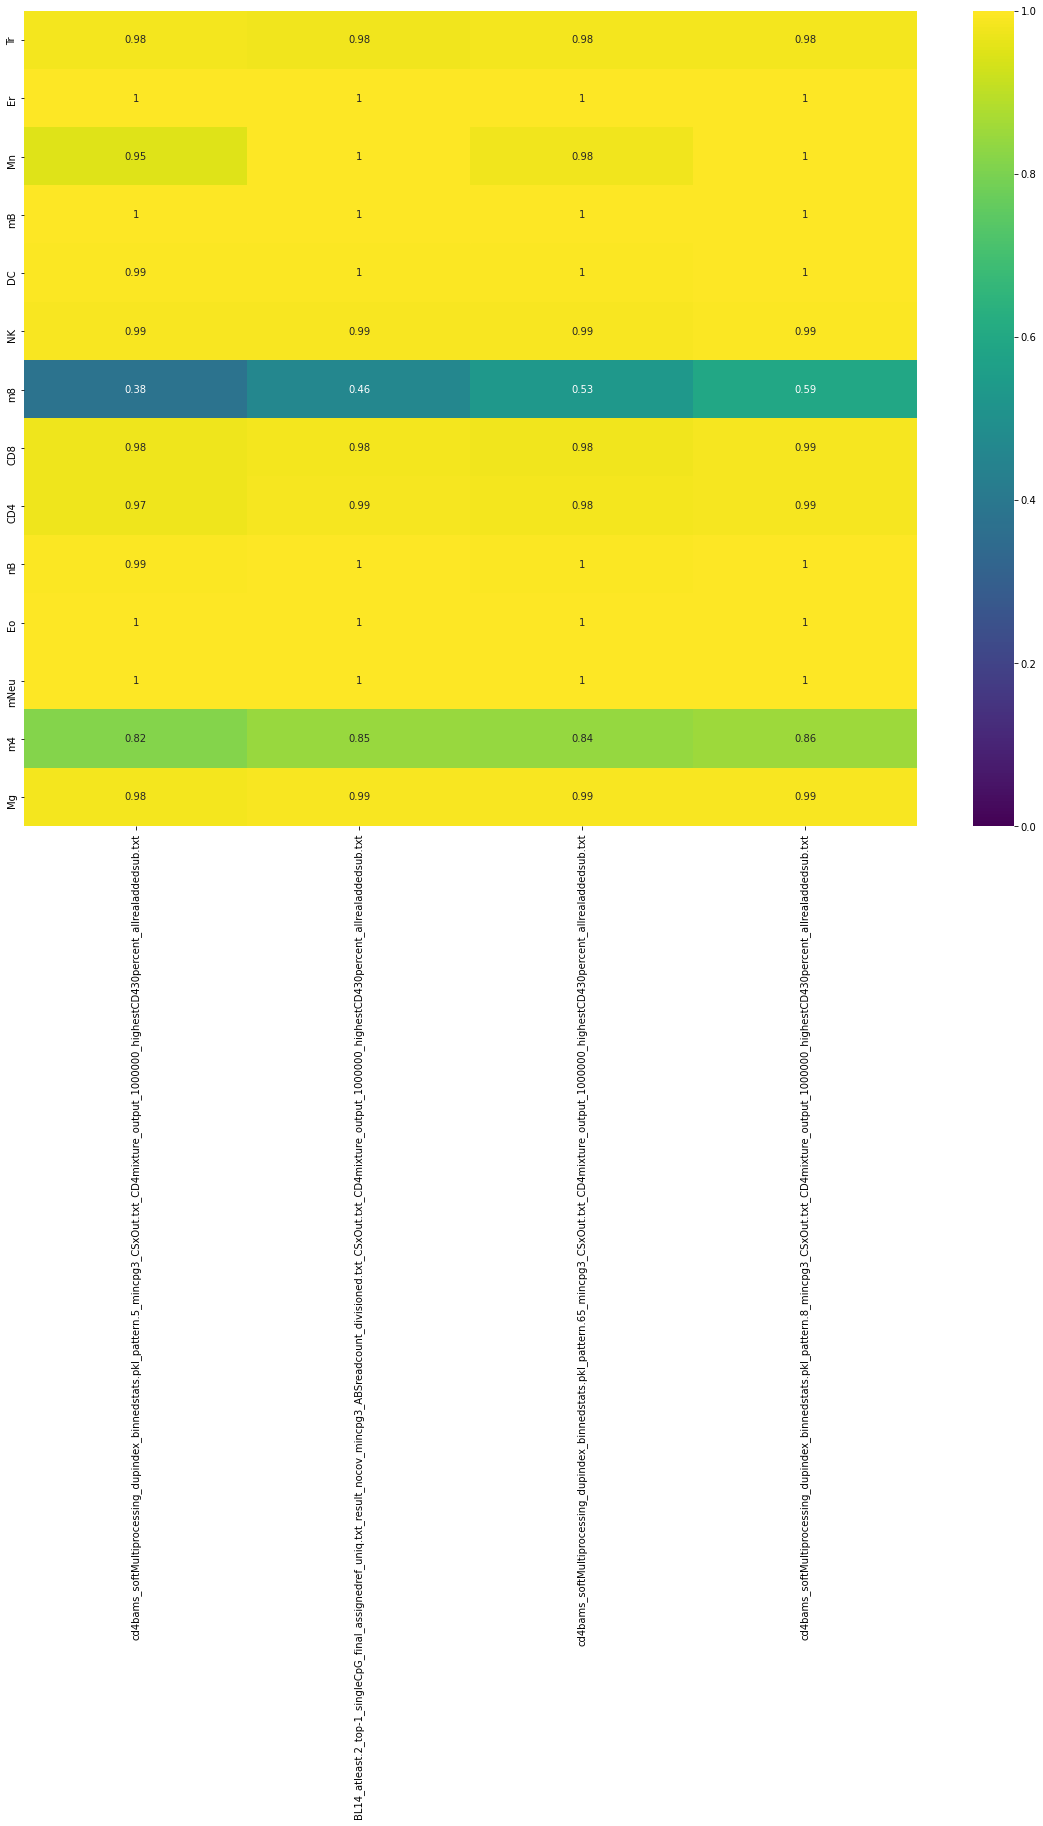

In [7]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

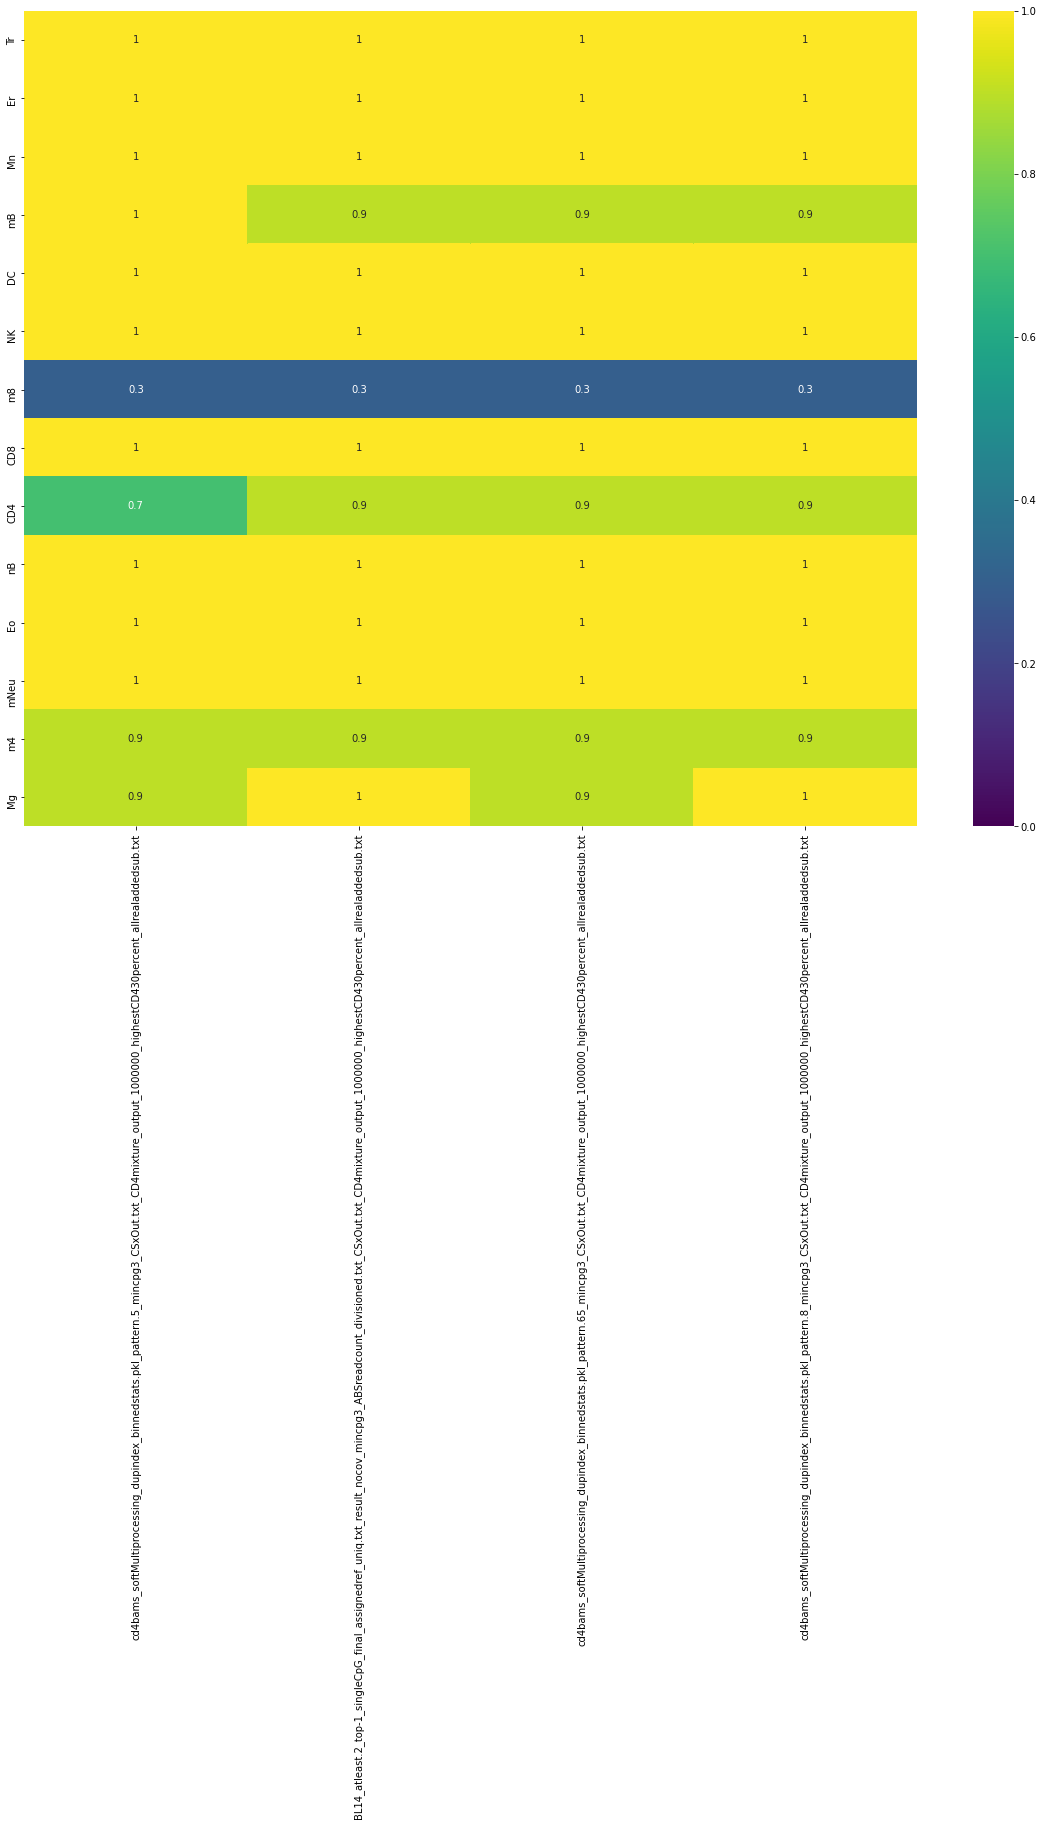

In [8]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')